# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [2]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [3]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [4]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [42]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM


pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
best_svm = None
best_val = -1
best_lr = -1
best_rs = -1
results = {}

iters = 300
for i in range(50):
    lr = random.uniform(5e-5,5e-4)
    rs = random.uniform(1,1e1)

    svm = LinearSVM()
    svm.train(X_train_feats, y_train, lr, rs, iters)

    train_predict = svm.predict(X_train_feats)
    train_accuracy = np.mean( train_predict == y_train)
    val_predict = svm.predict(X_val_feats)
    val_accuracy = np.mean( val_predict == y_val)
    
    
    results[(lr,rs)] = (train_accuracy, val_accuracy)
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, rs, train_accuracy, val_accuracy))
    if best_val < val_accuracy:
        best_val = val_accuracy
        best_lr = lr
        best_rs = rs
        best_svm = svm

    
print('best validation accuracy achieved during cross-validation: %f' % best_val)
print(best_lr, best_rs)

# best_lr = [4e-4]
# best_rs = [1.8]

iters = 3000
svm = LinearSVM()
svm.train(X_train_feats, y_train, best_lr, best_rs, iters)
train_predict = svm.predict(X_train_feats)
train_accuracy = np.mean( train_predict == y_train)
val_predict = svm.predict(X_val_feats)
val_accuracy = np.mean( val_predict == y_val)
print('validation accuracy: %f' % val_accuracy)


################################################################################
#                              END OF YOUR CODE                                #
################################################################################


lr 3.329130e-04 reg 3.203702e+00 train accuracy: 0.435041 val accuracy: 0.434000
lr 4.440612e-04 reg 7.385654e+00 train accuracy: 0.434571 val accuracy: 0.437000
lr 1.222878e-04 reg 9.038017e+00 train accuracy: 0.412939 val accuracy: 0.406000
lr 1.143301e-04 reg 3.181864e+00 train accuracy: 0.412490 val accuracy: 0.408000
lr 3.124963e-04 reg 4.613199e+00 train accuracy: 0.430408 val accuracy: 0.435000
lr 4.750319e-04 reg 6.742203e+00 train accuracy: 0.436816 val accuracy: 0.438000
lr 3.068864e-04 reg 7.108409e+00 train accuracy: 0.429755 val accuracy: 0.438000
lr 2.064998e-04 reg 9.218948e+00 train accuracy: 0.417755 val accuracy: 0.420000
lr 2.180637e-04 reg 4.388874e+00 train accuracy: 0.421510 val accuracy: 0.423000
lr 9.930972e-05 reg 2.111544e+00 train accuracy: 0.419918 val accuracy: 0.425000
lr 3.047556e-04 reg 7.663230e+00 train accuracy: 0.424755 val accuracy: 0.429000
lr 4.080561e-04 reg 8.705148e+00 train accuracy: 0.428102 val accuracy: 0.432000
lr 4.045925e-04 reg 3.721104

In [43]:
# Evaluate your trained SVM on the test set
y_test_pred = svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.472


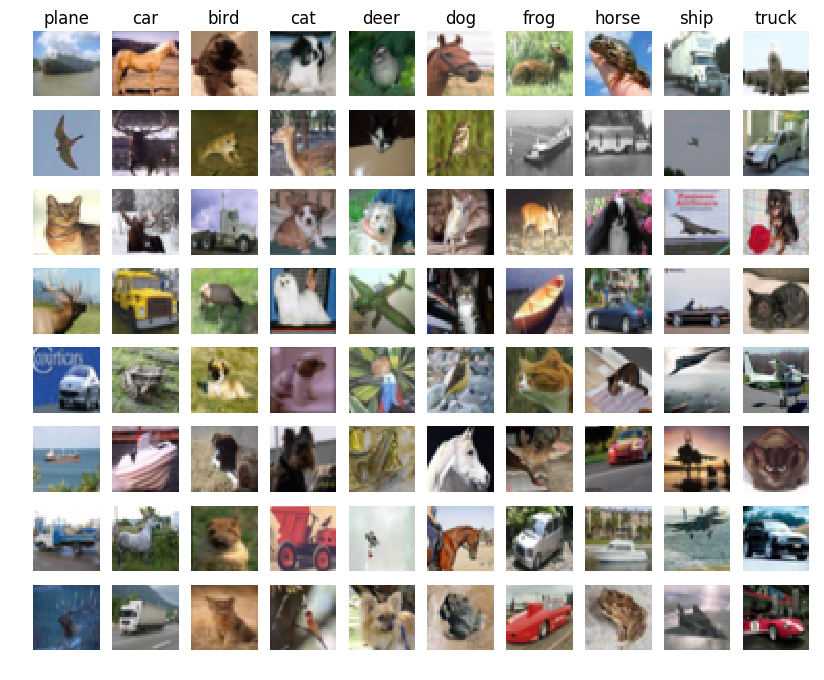

In [44]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?  

** Your Answer: **   
In color histogram, the images share more the same color is regard as more similiar.   
In the original SVM, the layout of the image is important.   

From misclassification images of dog, we can see many horse or bird which share similiar layout as dog images.    
From misclassification images of truck, we can see layouts are similiar to truck images.   
From misclassification images of plane, we can see the images have many blue color is regarded as plane.   


## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [5]:
print(X_train_feats.shape)

(49000, 155)


In [45]:
from cs231n.classifiers.neural_net import TwoLayerNet
import random

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

best_net = None
best_val = -1
best_lr = -1
best_rs = -1
results = {}

# iters = 100
# for i in range(20):
#     lr = random.uniform(5e-2,5e-1)
#     rs = random.uniform(1e-3,1e-2)

#     net = TwoLayerNet(input_dim, hidden_dim, num_classes)
#     net.train(X_train_feats, y_train, X_val_feats, y_val,
#             num_iters=iters, batch_size=500,
#             learning_rate=lr, learning_rate_decay=0.95,
#             reg=rs, verbose=True)
    
#     train_predict = net.predict(X_train_feats)
#     train_accuracy = np.mean( train_predict == y_train)
#     val_predict = net.predict(X_val_feats)
#     val_accuracy = np.mean( val_predict == y_val)
    
#     results[(lr,rs)] = (train_accuracy, val_accuracy)
#     print(lr,rs,val_accuracy)
#     if best_val < val_accuracy:
#         best_val = val_accuracy
#         best_lr = lr
#         best_re = rs
#         best_net = net

# # Print out results.
# for lr, reg in sorted(results):
#     train_accuracy, val_accuracy = results[(lr, reg)]
#     print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
#                 lr, reg, train_accuracy, val_accuracy))
    
# print('best validation accuracy achieved during cross-validation: %f' % best_val)
# print(best_lr, best_rs)

best_lr = 0.16
best_rs = 0.001

iters = 3000
net = TwoLayerNet(input_dim, hidden_dim, num_classes)
net.train(X_train_feats, y_train, X_val_feats, y_val,
            num_iters=iters, batch_size=500,
            learning_rate=best_lr, learning_rate_decay=0.95,
            reg=best_rs, verbose=True)
train_predict = net.predict(X_train_feats)
train_accuracy = np.mean( train_predict == y_train)
val_predict = net.predict(X_val_feats)
val_accuracy = np.mean( val_predict == y_val)
print('validation accuracy %f' % val_accuracy)


################################################################################
#                              END OF YOUR CODE                                #
################################################################################

iteration 0 / 3000: loss 2.302586
iteration 100 / 3000: loss 2.271520
iteration 200 / 3000: loss 1.801511
iteration 300 / 3000: loss 1.523236
iteration 400 / 3000: loss 1.525019
iteration 500 / 3000: loss 1.414409
iteration 600 / 3000: loss 1.401880
iteration 700 / 3000: loss 1.312004
iteration 800 / 3000: loss 1.377942
iteration 900 / 3000: loss 1.358265
iteration 1000 / 3000: loss 1.227967
iteration 1100 / 3000: loss 1.257813
iteration 1200 / 3000: loss 1.390485
iteration 1300 / 3000: loss 1.313330
iteration 1400 / 3000: loss 1.312815
iteration 1500 / 3000: loss 1.345258
iteration 1600 / 3000: loss 1.292859
iteration 1700 / 3000: loss 1.335195
iteration 1800 / 3000: loss 1.214050
iteration 1900 / 3000: loss 1.324203
iteration 2000 / 3000: loss 1.223853
iteration 2100 / 3000: loss 1.266788
iteration 2200 / 3000: loss 1.186219
iteration 2300 / 3000: loss 1.198978
iteration 2400 / 3000: loss 1.272573
iteration 2500 / 3000: loss 1.168896
iteration 2600 / 3000: loss 1.249636
iteration 270

In [25]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.544


# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!